# Cargada de datos

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2, os  # Importa las bibliotecas OpenCV (cv2) y os para manejar archivos y directorios

# Definir la ruta del directorio donde se encuentra el conjunto de datos (dataset)
data_path = '/content/drive/MyDrive/VisionComputador/DATASET'

# Obtener una lista con los nombres de las categorías (carpetas) dentro del dataset
categories = os.listdir(data_path)

# Crear una lista de etiquetas numéricas (0, 1, 2, ...) para las categorías
labels = [i for i in range(len(categories))]

# Crear un diccionario que asocia cada categoría con su etiqueta numérica
label_dict = dict(zip(categories, labels))  # Diccionario vacío al principio

# Imprimir el diccionario de etiquetas (categoría -> número)
print(label_dict)

# Imprimir la lista de categorías (nombres de las carpetas en el dataset)
print(categories)

# Imprimir la lista de etiquetas numéricas correspondientes a las categorías
print(labels)


{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [5]:
# Ruta a la carpeta del dataset
data_path = '/content/drive/MyDrive/VisionComputador/DATASET/train'

# Listar las clases y ordenarlas alfabéticamente
classes_path = os.listdir(data_path)
classesf = sorted(classes_path)

# Imprimir las clases ordenadas
print(classesf)

# Crear las etiquetas correspondientes a las clases
labels_classes = [i for i in range(len(classesf))]
print(labels_classes)


['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [6]:
data_path='/content/drive/MyDrive/VisionComputador/DATASET'

In [8]:
# Crear un diccionario que asocia cada clase con su respectiva etiqueta numérica
label_classes_dict = dict(zip(classesf, labels_classes))

In [9]:
#Imprimir diccionario
print(label_classes_dict)

{'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


In [10]:
import numpy as np

In [11]:
img_size = 128  # Tamaño al que se redimensionarán las imágenes
data = []  # Lista para almacenar las imágenes procesadas
target = []  # Lista para almacenar las etiquetas correspondientes
c = 0  # Contador para realizar seguimiento del progreso (opcional)
minValue = 70  # Valor mínimo para el umbral en la binarización

# Iterar sobre cada categoría del dataset
for category in categories:

    # Construir la ruta para la categoría
    cat_path = os.path.join(data_path, category)
    print(cat_path)  # Imprimir la ruta de la categoría
    cat_names = os.listdir(cat_path)  # Listar las subcarpetas (clases) dentro de la categoría
    print(cat_names)  # Imprimir los nombres de las clases

    # Iterar sobre cada clase dentro de la categoría
    for classes in cat_names:
        # Construir la ruta para la carpeta de la clase
        folder_path = os.path.join(data_path, category, classes)
        print(folder_path)  # Imprimir la ruta de la clase
        img_names = os.listdir(folder_path)  # Listar todas las imágenes dentro de la carpeta de la clase

        # Iterar sobre cada imagen dentro de la clase
        for img_name in img_names:
            # Construir la ruta completa de la imagen
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)  # Leer la imagen usando OpenCV

            try:
                # Convertir la imagen a escala de grises
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # Aplicar un desenfoque gaussiano para suavizar la imagen
                blur = cv2.GaussianBlur(gray, (5, 5), 2)

                # Aplicar un umbral adaptativo usando el método de Gauss para obtener una imagen binaria
                th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

                # Aplicar el umbral de Otsu para refinar el binarizado
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

                # Redimensionar la imagen procesada al tamaño definido (128x128 píxeles)
                resized = cv2.resize(res, (img_size, img_size))

                # Añadir la imagen procesada a la lista 'data'
                data.append(resized)

                # Añadir la etiqueta correspondiente a la lista 'target' usando el diccionario de clases
                target.append(label_classes_dict[classes])

            # Manejar excepciones si hay problemas con la lectura o procesamiento de alguna imagen
            except Exception as e:
                print('Exception:', e)

/content/drive/MyDrive/VisionComputador/DATASET/test
['Z', 'Y', 'X', 'W', 'T', 'Q', 'P', 'R', 'S', 'N', 'U', 'V', 'O', 'J', 'L', 'F', 'G', 'M', 'D', 'E', 'K', 'I', 'H', '0', 'C', 'B', 'A']
/content/drive/MyDrive/VisionComputador/DATASET/test/Z
/content/drive/MyDrive/VisionComputador/DATASET/test/Y
/content/drive/MyDrive/VisionComputador/DATASET/test/X
/content/drive/MyDrive/VisionComputador/DATASET/test/W
/content/drive/MyDrive/VisionComputador/DATASET/test/T
/content/drive/MyDrive/VisionComputador/DATASET/test/Q
/content/drive/MyDrive/VisionComputador/DATASET/test/P
/content/drive/MyDrive/VisionComputador/DATASET/test/R
/content/drive/MyDrive/VisionComputador/DATASET/test/S
/content/drive/MyDrive/VisionComputador/DATASET/test/N
/content/drive/MyDrive/VisionComputador/DATASET/test/U
/content/drive/MyDrive/VisionComputador/DATASET/test/V
/content/drive/MyDrive/VisionComputador/DATASET/test/O
/content/drive/MyDrive/VisionComputador/DATASET/test/J
/content/drive/MyDrive/VisionComputador/D

In [12]:
# Convertir la lista 'data' (que contiene las imágenes procesadas) en un array de NumPy
datanp = np.array(data)

# Verificar y mostrar la forma (dimensiones) del array de imágenes

print(datanp.shape)

# Convertir la lista 'target' (que contiene las etiquetas correspondientes) en un array de NumPy
targetnp = np.array(target)

# Verificar y mostrar la forma del array de etiquetas

print(targetnp.shape)


(17113, 128, 128)
(17113,)


In [13]:
import numpy as np
import tensorflow as tf  # Asegúrate de importar tensorflow

# Normalizar los datos de entrada
data = np.array(data) / 255.0
data = np.reshape(data, (data.shape[0], img_size, img_size, 1))

# Convertir los targets (etiquetas) a un array
target = np.array(target)

# Usar el método actualizado para convertir a one-hot encoding
from tensorflow.keras.utils import to_categorical

new_target = to_categorical(target)


In [14]:
new_target.shape

(17113, 27)

In [15]:
# Guardar los arrays 'data' (imágenes) y 'new_target' (etiquetas) en archivos .npy
# Esto permite guardar los datos en el disco para usarlos más tarde sin tener que procesar las imágenes nuevamente
np.save('data_img', data)
np.save('target', new_target)

# Cargar los archivos .npy
data = np.load('data_img.npy')
target = np.load('target.npy')

# Importar la función para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
# El 20% de los datos se usará para el conjunto de prueba (test_size=0.2)
train_data, test_data, train_target, test_target = train_test_split(data, new_target, test_size=0.2)


# Entrenamiento

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import os

#Definir el tamaño del lado de la imagen
sz = 128

# Paso 1 - Construir la red CNN

# Iniciar el CNN
classifier = Sequential()

# Primera capa convolucional y pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional y pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
classifier.add(Flatten())

# Añadir una capa totalmente conectada
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax'))  # softmax para más de 2 clases

# Compilar el CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
classifier.summary()

# Paso 2 - Preparar los datos y entrenar el modelo

# Definir el callback para guardar los mejores modelos
checkpoint = ModelCheckpoint('model-{epoch:03d}.keras',
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto')

# Entrenar el modelo
history = classifier.fit(train_data, train_target,
                         shuffle=True,
                         epochs=20,
                         callbacks=[checkpoint],
                         validation_split=0.3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 96)                  │          12,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 27)                  │           1,755 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,716,443 (14.18 MB)

 Trainable params: 3,716,443 (14.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1435 - loss: 2.9695
Epoch 1: val_loss improved from inf to 0.56410, saving model to model-001.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.1440 - loss: 2.9674 - val_accuracy: 0.8875 - val_loss: 0.5641
Epoch 2/20
298/300 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6249 - loss: 1.0780
Epoch 2: val_loss improved from 0.56410 to 0.16694, saving model to model-002.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6254 - loss: 1.0767 - val_accuracy: 0.9701 - val_loss: 0.1669
Epoch 3/20
299/300 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7708 - loss: 0.6629
Epoch 3: val_loss improved from 0.16694 to 0.07573, saving model to model-003.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7709 - loss: 0.6625 - val_accuracy: 0.9893 - val_loss: 0.0757
Epoch 4/20
296/300 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8269 - loss: 0.4845
Epoch 4: val_loss improved from 0.07573 to 0.0503

In [ ]:
# Evaluar el modelo en los datos de prueba
test_loss, test_accuracy = classifier.evaluate(test_data, test_target)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9996 - loss: 0.0031
Test Loss: 0.0031797064002603292, Test Accuracy: 0.9994156956672668


# Evaluacion

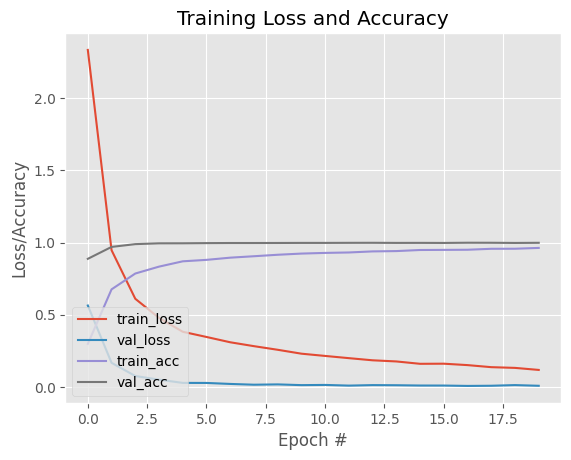

In [ ]:
# Número de épocas (epochs)
N = 20

# Obtener la historia del entrenamiento
H = history

# Graficar la pérdida (loss) y la precisión (accuracy) del entrenamiento y validación
import numpy as np
import matplotlib.pyplot as plt

# Estilo de las gráficas
plt.style.use("ggplot")
plt.figure()

# Pérdida del entrenamiento y validación
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
# Precisión del entrenamiento y validación
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

# Títulos y etiquetas de los ejes
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")

# Leyenda y guardado de la figura
plt.legend(loc="lower left")
plt.savefig('evaluation.png')  # Guardar la gráfica como imagen

# Mostrar la gráfica
plt.show()

In [ ]:
# Guardar el modelo en formato .h5 (compatibilidad)
print("[INFO] saving ASL classifier model...")
classifier.save('asl_classifier_1.h5')
print("Done!")

[INFO] saving ASL classifier model...
Done!


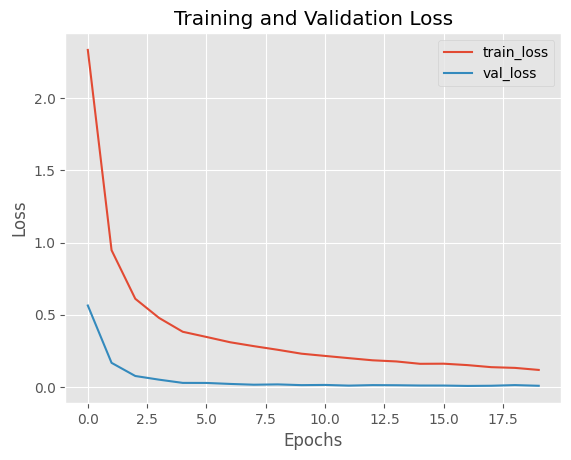

In [ ]:
# Graficar solo la pérdida (loss) del entrenamiento y validación
plt.figure()
plt.plot(H.history['loss'], label='train_loss')
plt.plot(H.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")
plt.show()

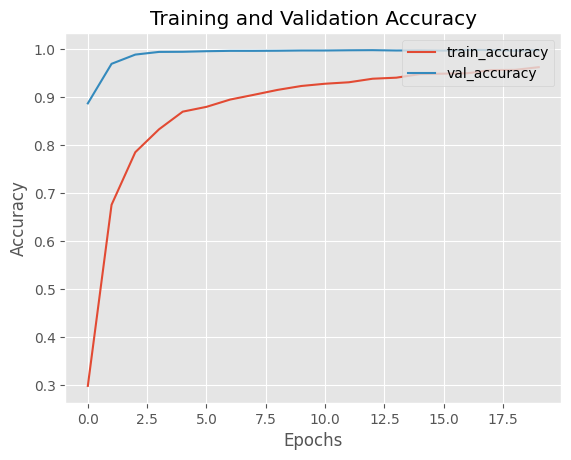

In [ ]:
# Graficar solo la precisión (accuracy) del entrenamiento y validación
plt.figure()
plt.plot(H.history['accuracy'], label='train_accuracy')
plt.plot(H.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title("Training and Validation Accuracy")
plt.show()

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       0.99      1.00      1.00       127
           2       1.00      1.00      1.00       131
           3       1.00      1.00      1.00       123
           4       1.00      1.00      1.00       110
           5       1.00      1.00      1.00       117
           6       1.00      0.99      0.99       146
           7       1.00      0.99      1.00       110
           8       0.99      1.00      1.00       114
           9       1.00      1.00      1.00       128
          10       1.00      1.00      1.00       119
          11       1.00      1.00      1.00       124
          12       1.00      1.00      1.00       149
          13       1.00      1.00      1.00       131
          14       1.00      1.00      1.00       141
          15       1.00      1.00      1.00       137
          16     

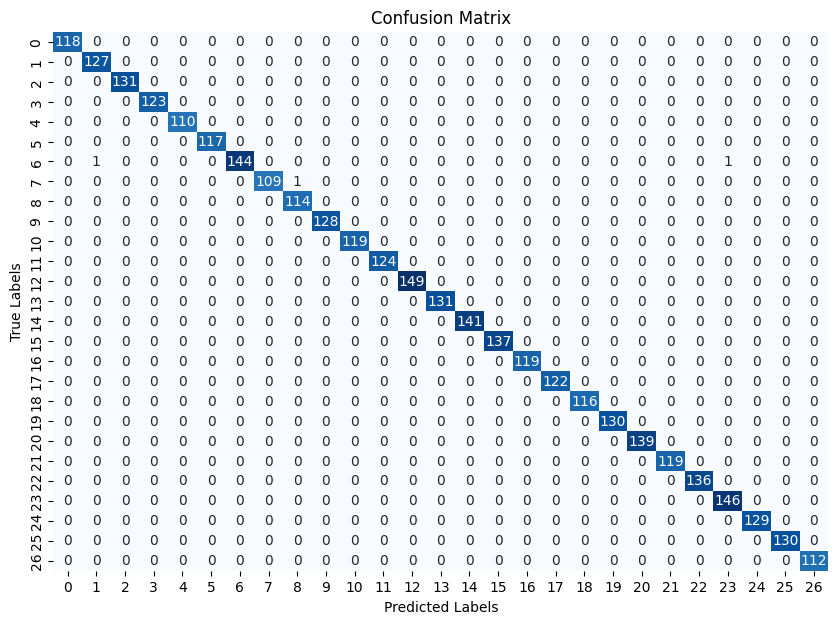

In [19]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el modelo entrenado
model = load_model('asl_classifier_1.h5')

# Evaluar el modelo en los datos de prueba usando el método evaluate
# Esto devuelve la pérdida y la precisión en los datos de prueba
test_loss, test_accuracy = model.evaluate(test_data, test_target)

# Imprimir los resultados de la evaluación
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Convertir test_target a etiquetas numéricas si está en formato one-hot
if len(test_target.shape) > 1 and test_target.shape[1] > 1:
    test_target = np.argmax(test_target, axis=1)

# Realizar las predicciones en los datos de prueba
predictions = model.predict(test_data)

# Convertir las predicciones a clases correspondientes
predicted_classes = np.argmax(predictions, axis=1)

# Mostrar un reporte de clasificación detallado
report = classification_report(test_target, predicted_classes)
print("Classification Report:")
print(report)

# Crear y mostrar la matriz de confusión
conf_matrix = confusion_matrix(test_target, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()
